<a href="https://colab.research.google.com/github/serrve1/ubion_project1/blob/main/MVO%EB%AA%A8%ED%98%95%EC%97%B0%EC%8A%B5%EC%9E%90%EB%A3%8C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # 한글 폰트 설정 => 런타임 다시 시작 후 실행
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
# 한글 나눔 폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 경로 등록
fontprop = fm.FontProperties(fname=font_path, size=12)


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [4]:
# KOSPI 5개 종목 가져오기
# 1. 데이터 수집(시가총액 5위)
stocks = ['삼성전자','현대차', 'POSCO', '현대모비스', '한국전력']
ticker = ['005930', '005380', '005490', '012330', '015760']
st = {}

for i, t in enumerate(ticker):
    symbol = t+'.KS'
    data = yf.download(symbol , '2018-10-13', '2022-12-23')
    st[stocks[i]] = data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func

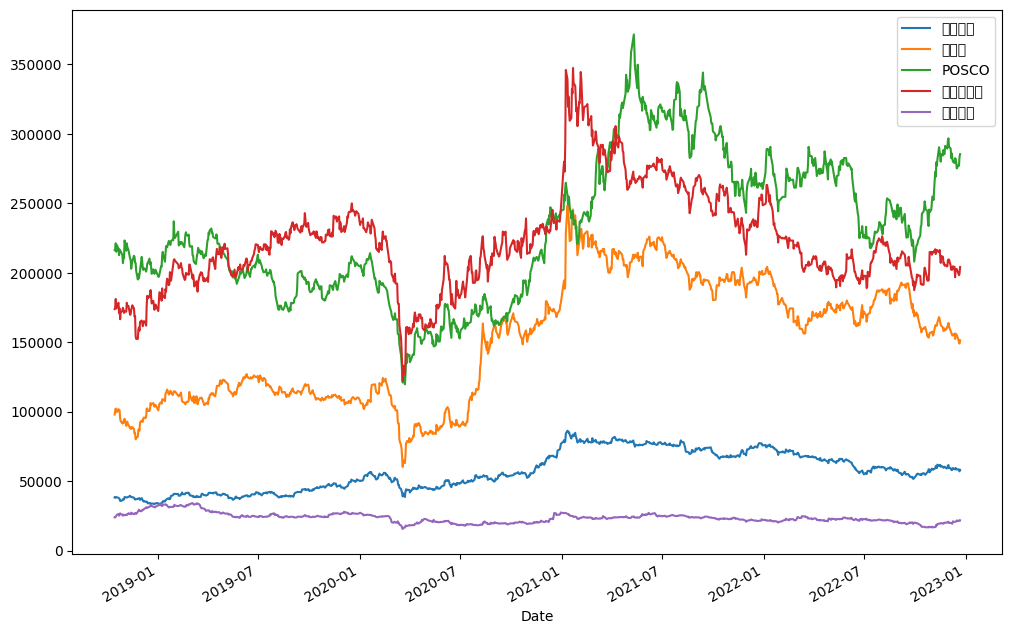

In [5]:
# 2. Adj Close 추세 확인
plt.figure(figsize=(12, 8))
for k, v in st.items():
    v['Adj Close'].plot(label=k)
plt.legend()

In [6]:
삼성전자 = st[stocks[0]]['Adj Close']
현대차 = st[stocks[1]]['Adj Close']
posco = st[stocks[2]]['Adj Close']
현대모비스 = st[stocks[3]]['Adj Close']
한국전력 = st[stocks[4]]['Adj Close']
df = pd.concat([삼성전자, 현대차,posco,현대모비스,한국전력],axis = 1)
df.columns = ['삼성전자','현대차','posco','현대모비스','한국전력']
df
#df = DataFrame( columns ,data = )
#daily_ret = df.pct_change()

,삼성전자,현대차,posco,현대모비스,한국전력
Date,,,,,
2018-10-15,38203.371094,97924.843750,216307.125000,173814.703125,23923.908203
2018-10-16,38028.925781,100513.156250,216714.484375,174727.109375,23828.404297
2018-10-17,38508.648438,102238.726562,221195.437500,181114.015625,24353.679688
2018-10-18,38421.421875,100081.781250,215085.062500,174270.921875,24974.458984
2018-10-19,38290.593750,99650.406250,219973.359375,176095.734375,25690.744141
...,...,...,...,...,...
2022-12-16,58497.925781,155190.796875,275057.625000,202668.828125,21650.000000
2022-12-19,58497.925781,151848.234375,277522.281250,199233.750000,21300.000000
2022-12-20,57613.085938,149938.187500,277029.343750,198252.296875,21400.000000


종목별 상관계수 확인

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

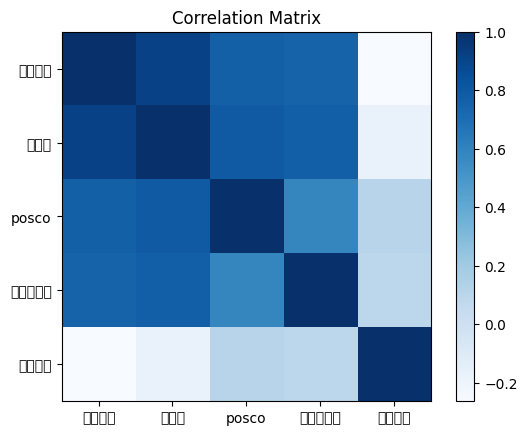

In [7]:
import matplotlib.pyplot as plt
# 상관행렬 계산
Corr = df.corr()
plt.figure()
plt.title('Correlation Matrix')
plt.imshow(Corr, cmap=plt.cm.Blues)
plt.xticks(range(len(stocks)),df.columns)
plt.yticks(range(len(stocks)),df.columns)
plt.colorbar()
plt.show()

In [8]:
daily_ret = df.pct_change()
daily_ret.fillna(0)
# 252는 평균 개장일 (미국기준)
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

In [9]:
stocks

['삼성전자', '현대차', 'POSCO', '현대모비스', '한국전력']

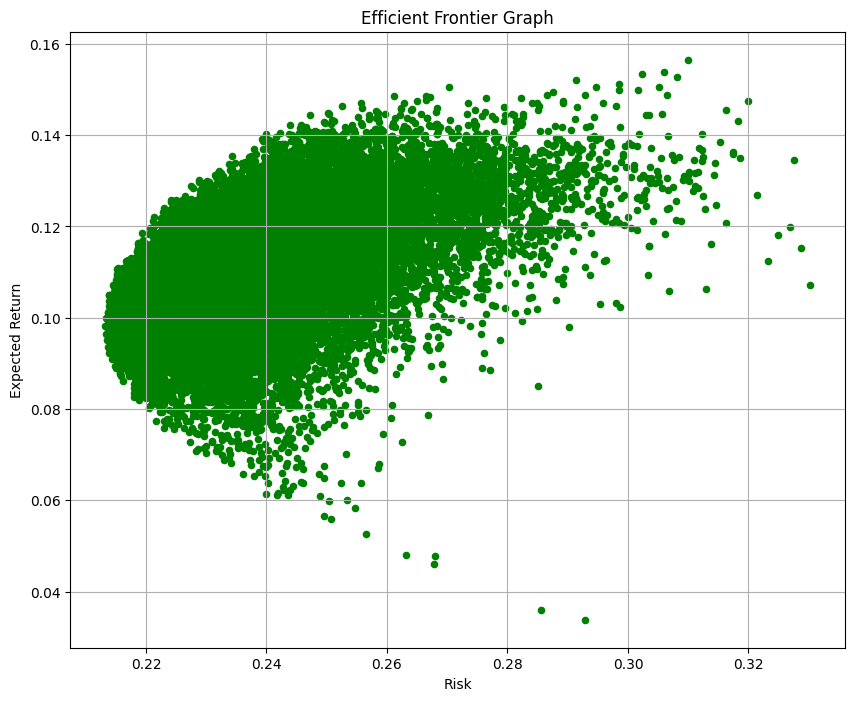

In [10]:
# 시가총액 5순위 주식의 비율을 다르게 해 20,000개 포트폴리오 생성
# 1. 수익률, 리스크, 비중 list 생성
# 수익률 = port_ret
# 리스크 = port_risk
# 비  중 = port_weights
port_ret = []
port_risk = []
port_weights = []

for i in range(20000):
    # 2. 랜덤 숫자 5개 생성 - 랜덤숫자 5개의 합 = 1이되도록 생성
    weights = np.random.random(len(stocks))# 5개의 칼럼별로 랜덤 숫자 생성
    weights /= np.sum(weights) # 합이 1이되도록
    # 3. 랜덤 생성된 종목별 비중 배열과 종목별 연간 수익률을 곱해 포트폴리오의 전체 수익률(returns)를 구한다.
    returns = np.dot(weights, annual_ret)

    # 4. 종목별 연간공분산과 종목별 비중배열 곱하고, 다시 종목별 비중의 전치로 곱한다.
    # 결과값의 제곱근을 sqrt()함수로 구하면 해당 포트폴리오 전체 risk가 구해진다.
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    # 5. 20,000개 포트폴리오의 수익률, 리스크, 종목별 비중을 각각 리스트에 추가한다.
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)

portfolio = {'Returns' : port_ret, 'Risk' : port_risk}
for j, s in enumerate(stocks):
    # 6. portfolio 4종목의 가중치 weights를 1개씩 가져온다.
    portfolio[s] = [weight[j] for weight in port_weights]

# 7. 최종 df는 시총 상위 5종목의 보유 비중에 따른 risk와 예상 수익률을 확인할 수 있다.
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk'] + [s for s in stocks]]

# 8. 효율적 투자선  그래프 그리기
df.plot.scatter(x='Risk', y='Returns', color ='g', figsize=(10,8), grid=True)
plt.title('Efficient Frontier Graph')
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.show()

위험자산만으로 효율적 프론티어까지 그릴 수 있을 것이다. MVO를 적용하면 최적의 자산별 가중치가 나올 것
